# Newton Fractals
---
This is a notebook about Newton fractals. I borrowed *heavily* from Rafa Rodríguez Galván's GitHub repo for this one:

https://github.com/rrgalvan

Specifically, I modified his Newton Fractal example (based on complex Newton iteration toward the roots of $f(z) = z^3-1$) for the illustration below.

https://github.com/rrgalvan/python-mnii/blob/master/1-ceros-de-funciones/Newton-Fractal.ipynb

In [71]:
# Preparing the fractal image data

import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# Newton fractals
# Based on FB - 201003291, http://code.activestate.com/

# image resolution (x and y pixels)
imgx = 1200
imgy = 1200
image = Image.new("RGB", (imgx, imgy))

# Complex window (range in x (real) and y (imaginary))
xa = -1.0
xb = 1.0
ya = -1.0
yb = 1.0

maxIt = 20 # max Newton iterations allowed
h = 1e-8 # step size for approximate numerical derivative
eps = 1e-5 # max error allowed (in Newton method convergence)

# Feel free to change the complex function here to generate other fractals!
# Examples: https://en.wikipedia.org/wiki/Newton_fractal
def f(z):
    return z * z * z - 1.0

# (from Brad, 3/24/19) I hand-rolled the rootColorize method, so you'll likely 
# have to change that if you change the function (for the prettiest plots ;) ).
def rootColorize(z):
    # hardcoded roots of f(z) = z^3 - 1
    root1 = complex(1,0)
    root2 = complex(-0.5,3**0.5)
    root3 = complex(-0.5,-3**0.5)
    
    dist1 = abs(root1-z)
    dist2 = abs(root2-z)
    dist3 = abs(root3-z)
    
    # create Julia set (colorize point depending on which root is reached from it)
    if dist1 < dist2 and dist1 < dist3:
        # 'Pomegranate' from materialui.co
        return 192,57,43
    elif dist2 < dist1 and dist2 < dist3:
        # 'Peterriver' from materialui.co
        return 52,152,219
    elif dist3 < dist1 and dist3 < dist2:
        # 'Emerland' from materialui.co
        return 46,204,113
    
    return 0, 0, 0

# Create fractal image from Cartesian lattice of complex inputs
print("Running complex newton iterations from %i x %i pixels" % (imgx,imgy), end="... ")
for y in range(imgy):
    # scaling imaginary component from pixel map
    zy = y * (yb - ya) / (imgy - 1) + ya
    for x in range(imgx):
        # scaling real component from pixel map
        zx = x * (xb - xa) / (imgx - 1) + xa
        z = complex(zx, zy)
        for i in range(maxIt):
            # approximation of complex numerical derivative
            dz = (f(z + complex(h, h)) - f(z)) / complex(h, h)
            z0 = z - f(z) / dz    # Newton iteration
            if abs(z0 - z) < eps: # stop when close enough to any root
                break
            z = z0
        r, g, b = rootColorize(z)
        image.putpixel((x, y), (r, g, b))
print ("¡bien!")

Running complex newton iterations from 1200 x 1200 pixels... ¡bien!


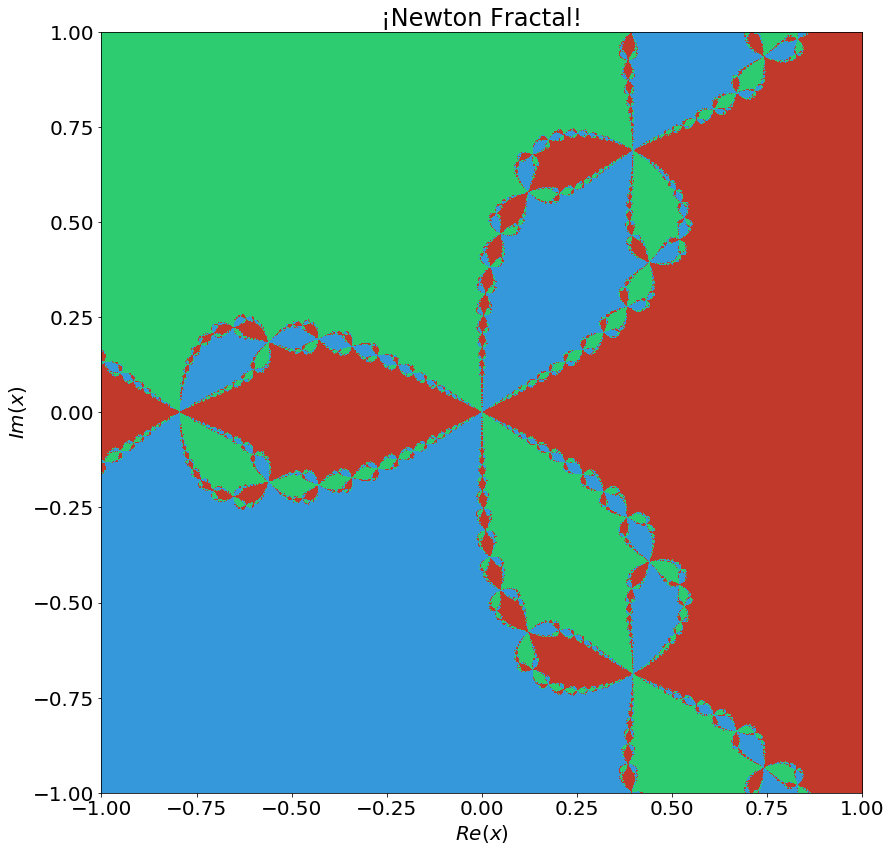

In [73]:
# Plotting the fractal image

plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize=(14,14))

ax.imshow(image, extent=[xa,xb,ya,yb])
plt.title("¡Newton Fractal!")
plt.xlabel('$Re(x)$')
plt.ylabel('$Im(x)$');